<a href="https://colab.research.google.com/github/thaicoh/Nhom2_CNTT2_HandwritingRecognition/blob/main/Nhom2_HandwritingRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nhận diện chữ cái viết tay từ dữ liệu A-Z Handwritten Alphabets**

---



# **I. Giới thiệu**

### **Mô tả vấn đề**
- Dự án này tập trung vào việc nhận diện chữ cái từ hình ảnh chữ viết tay. Chúng mình sẽ sử dụng bộ dữ liệu "A-Z Handwritten Alphabets" từ Kaggle để xây dựng các mô hình học máy nhằm nhận diện và phân loại các chữ cái từ hình ảnh.

### **Mục tiêu của dự án**
- Tìm hiểu về quy trình tạo ra một model ML và cách xử lý data.
- Xây dựng và đánh giá hiệu suất của các mô hình học máy khác nhau bao gồm Decision Tree, Naive Bayes, Random Forest, và Convolutional Neural Network (CNN) để nhận diện chữ cái từ hình ảnh.
- Áp dụng các phương pháp đánh giá như Accuracy, Precision, Recall, và F1-score để đánh giá hiệu suất của các mô hình.

### **Tổng quan về bộ dữ liệu**
- Bộ dữ liệu bao gồm 26 thư mục (A-Z) chứa các hình ảnh chữ viết tay có kích thước 28x28 pixel, mỗi chữ cái trong hình ảnh được căn giữa để vừa với hộp 20x20 pixel.

- Mỗi hình ảnh được lưu trữ dưới dạng mức xám.

- Mỗi dòng đại diện cho một ảnh có kích thước 28*28, ký tự đầu tiên đại diện cho class mà ảnh đó thuộc về.

  Ví dụ:

  A là class 0.

  B là class 1.

  ...

  Z là class 26.

  Do đó độ dài của list đại diện cho mỗi dòng là 28*28 + 1 = 785.


- Lưu ý: Có thể chứa một số hình ảnh nhiễu..

### **Tiến trình thực hiện**

1. **Chuẩn bị dữ liệu:** Đọc và xử lý bộ dữ liệu từ Kaggle, chia thành tập huấn luyện và tập kiểm tra.
2. **Xây dựng mô hình:** Sử dụng các thuật toán Machine Learning như Decision Tree, Naive Bayes, Random Forest để huấn luyện.
3. **Đánh giá hiệu suất:** Đánh giá mô hình sử dụng các phương pháp đánh giá như Accuracy, Precision, Recall, và F1-score.
4. **So sánh mô hình:** So sánh hiệu suất của các mô hình và tìm ra mô hình tốt nhất.


# **II. Chuẩn bị dữ liệu**

### **1. Thu thập và khám phá dữ liệu**

In [1]:
# import các thư viện cần thiết
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

import csv
import matplotlib
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
#Visualization Libraries
import seaborn as sns

#Data processing Libraries
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df = pd.read_csv("/content/sample_data/A_Z Handwritten Data.csv")
df = pd.read_csv("/content/drive/MyDrive/A_Z.csv")

# Tạo danh sách tên cột
column_names = ["label"] + [f"{i}x{j}" for i in range(1, 29) for j in range(1, 29)]

# Đặt tên cột cho DataFrame
df.columns = column_names

In [ ]:
df.shape

(372450, 785)

In [ ]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 2.2 GB


In [ ]:
print(f"Các giá trị nằm trong cột label: {df['label'].unique()}")

Các giá trị nằm trong cột label: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


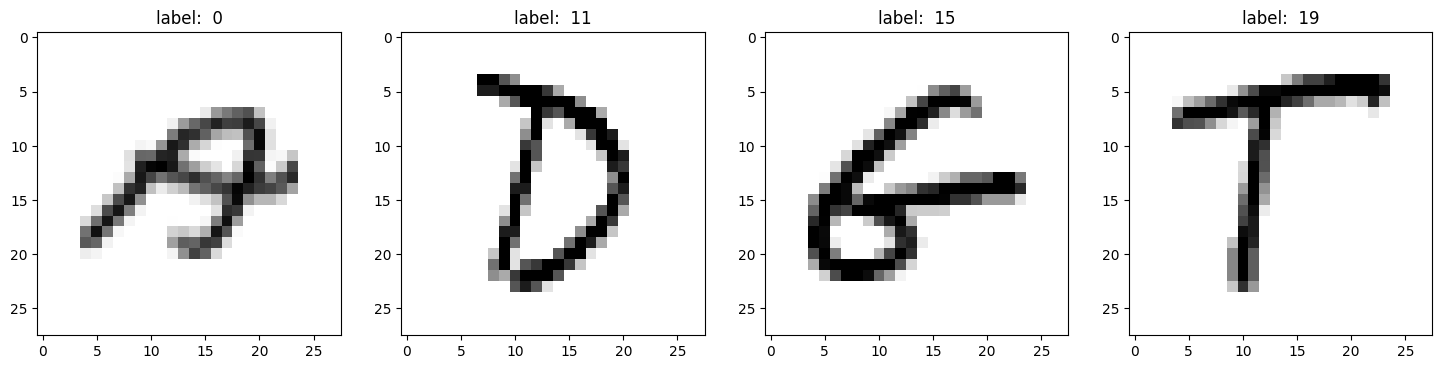

In [ ]:
# Hiển thị thử vài hình ảnh

X = df.drop(columns='label')
X.reset_index()

# Chuyển đổi dữ liệu hàng thứ 5 thành mảng 28x28
image_array1 = np.array(X.iloc[1000]).reshape(28, 28)
image_array2 = np.array(X.iloc[50000]).reshape(28, 28)
image_array3 = np.array(X.iloc[70000]).reshape(28, 28)
image_array4 = np.array(X.iloc[300000]).reshape(28, 28)

# Hiển thị ảnh
plt.figure(figsize=(18, 4))

plt.subplot(1,4,1)
plt.imshow(image_array1, cmap='binary')  # Hiển thị ảnh dưới dạng grayscale
plt.title(f"label:  {df['label'].iloc[1000]}")

plt.subplot(1,4,2)
plt.imshow(image_array2, cmap='binary')  # Hiển thị ảnh dưới dạng grayscale
plt.title(f"label:  {df['label'].iloc[100000]}")

plt.subplot(1,4,3)
plt.imshow(image_array3, cmap='binary')  # Hiển thị ảnh dưới dạng grayscale
plt.title(f"label:  {df['label'].iloc[200000]}")

plt.subplot(1,4,4)
plt.imshow(image_array4, cmap='binary')  # Hiển thị ảnh dưới dạng grayscale
plt.title(f"label:  {df['label'].iloc[300000]}")

plt.show()


In [ ]:
# Tạo mảng arr chứ số lượng của mỗi chữ cái trong dataframe
arr = np.array([]);
for i in range(0,26):
  arr= np.append(arr,(df[df.columns[0]]==i).sum())
  print(f"{chr(i + 65)} : {(df[df.columns[0]]==i).sum()}  {round(((df[df.columns[0]] == i).sum()) / len(df) * 100, 2)}%")

A : 13869  3.72%
B : 8668  2.33%
C : 23409  6.29%
D : 10134  2.72%
E : 11440  3.07%
F : 1163  0.31%
G : 5762  1.55%
H : 7218  1.94%
I : 1120  0.3%
J : 8493  2.28%
K : 5603  1.5%
L : 11586  3.11%
M : 12336  3.31%
N : 19010  5.1%
O : 57825  15.53%
P : 19341  5.19%
Q : 5812  1.56%
R : 11566  3.11%
S : 48419  13.0%
T : 22495  6.04%
U : 29008  7.79%
V : 4182  1.12%
W : 10784  2.9%
X : 6272  1.68%
Y : 10859  2.92%
Z : 6076  1.63%


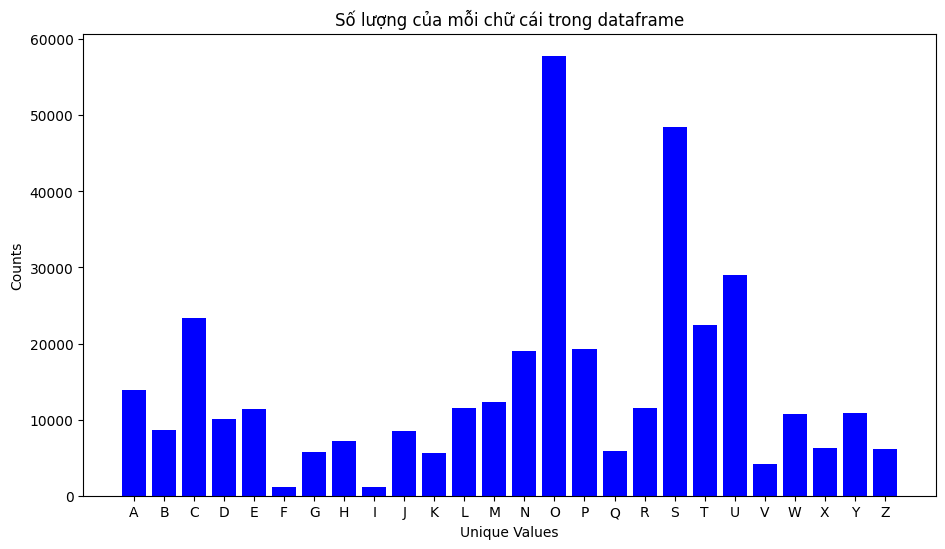

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(np.array([chr(i) for i in range(65, 91)]),arr, color ="blue")
plt.title('Số lượng của mỗi chữ cái trong dataframe')
plt.xlabel('Unique Values')
plt.ylabel('Counts')
plt.show()

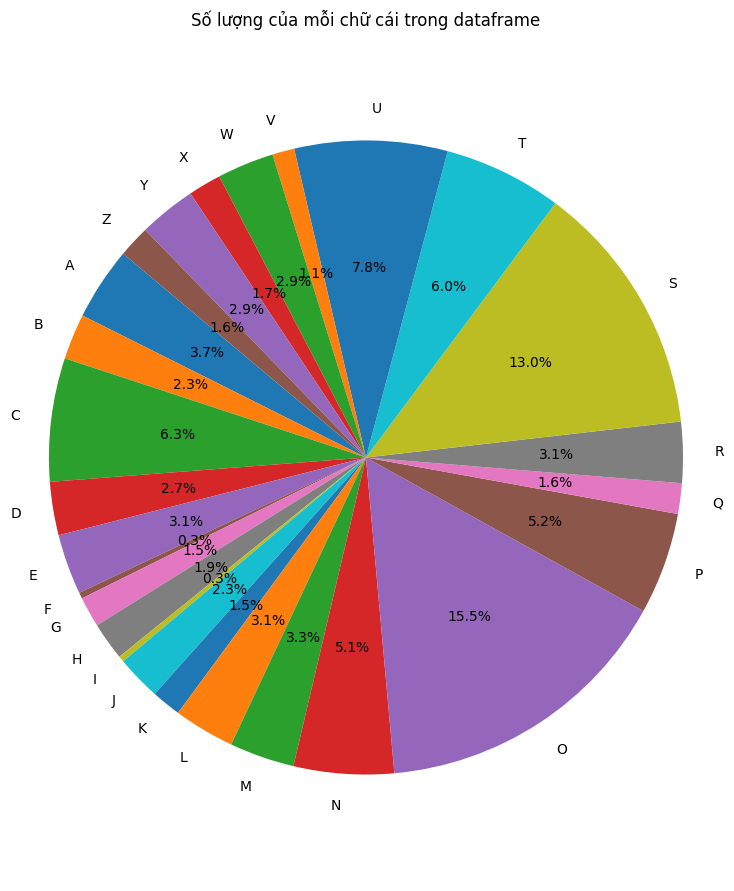

In [ ]:
plt.figure(figsize=(9, 11))
plt.pie(arr, labels=np.array([chr(i) for i in range(65, 91)]), autopct='%1.1f%%', startangle=140)
plt.title('Số lượng của mỗi chữ cái trong dataframe')
plt.axis('equal')  # Để đảm bảo vẽ ra là hình tròn
plt.show()


## **2. Tiền xử lý và chuẩn bị dữ liệu**


### **2.1 Xử lý dữ liệu bị thiếu và trùng lặp**

In [ ]:
# Kiểm tra dữ liệu bị thiếu
df.isna().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [ ]:
# Kiểm tra dữ liệu bị trùng
df.duplicated().sum()

171355

In [ ]:
# Xóa dữ liệu trùng
df = df.drop_duplicates()

In [ ]:
# Tạo mảng arr1 chứa số lượng dữ liệu của mỗi class sau khi đã làm sạch df
arr1 = np.array([]);
print("Số lượng và tỉ lệ các class trong Df sau khi làm sạch:")
print("")
for i in range(0,26):
  arr1= np.append(arr1,(df[df.columns[0]]==i).sum())
  print(f"{chr(i + 65)} : {(df[df.columns[0]]==i).sum()}  {round(((df[df.columns[0]] == i).sum()) / len(df) * 100, 2)}%")

Số lượng và tỉ lệ các class trong Df sau khi làm sạch:

A : 7680  3.82%
B : 4804  2.39%
C : 12170  6.05%
D : 5430  2.7%
E : 6039  3.0%
F : 1147  0.57%
G : 3206  1.59%
H : 3974  1.98%
I : 1061  0.53%
J : 4593  2.28%
K : 3156  1.57%
L : 6226  3.1%
M : 10373  5.16%
N : 9909  4.93%
O : 29306  14.57%
P : 10087  5.02%
Q : 3281  1.63%
R : 6170  3.07%
S : 24622  12.24%
T : 11698  5.82%
U : 14921  7.42%
V : 2616  1.3%
W : 5804  2.89%
X : 3557  1.77%
Y : 5833  2.9%
Z : 3432  1.71%


In [ ]:
# Kiểm tra lại
df.duplicated().sum()

0

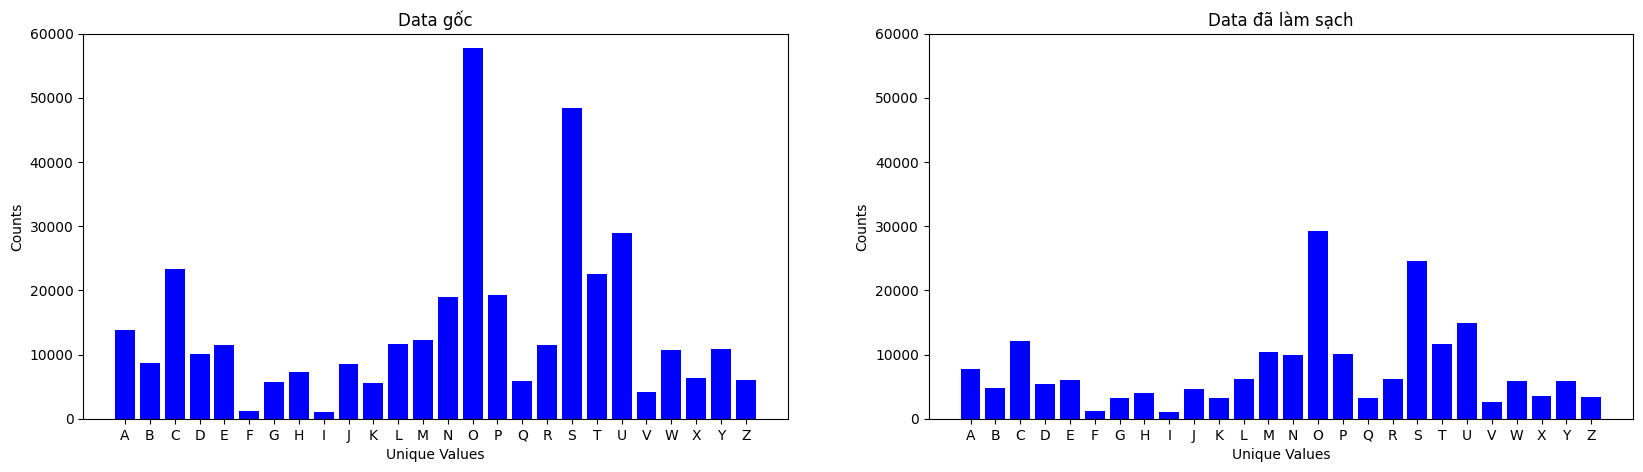

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)  # 1 hàng, 2 cột, vẽ biểu đồ ở ô thứ nhất
plt.bar(np.array([chr(i) for i in range(65, 91)]), arr, color="blue")
plt.ylim(0, 60000)  # Đặt giới hạn trên trục y bằng max của hai mảng arr và arr1
plt.title('Data gốc')
plt.xlabel('Unique Values')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)  # 1 hàng, 2 cột, vẽ biểu đồ ở ô thứ nhất
plt.bar(np.array([chr(i) for i in range(65, 91)]), arr1, color="blue")
plt.ylim(0, 60000)  # Đặt giới hạn trên trục y bằng max của hai mảng arr và arr1
plt.title('Data đã làm sạch')
plt.xlabel('Unique Values')
plt.ylabel('Counts')
plt.show()


### **2.2 Xóa padding của ảnh**

- Trong quá trình xử lý dữ liệu cho ba thuật toán Decision Tree (DT), Naive Bayes (NB), và Random Forest (RF), dữ liệu hình ảnh trong tập dữ liệu được cung cấp có kích thước 28x28 pixel chữ cái dược đặt trong ô 20x20 nằm giữa padding chiếm 4 pixel ở mỗi phía.

- Để chuẩn bị dữ liệu cho các thuật toán này, chúng tôi thực hiện bước xóa padding

In [ ]:
# Chia df thành X(chứa các feature) và y(chứa các label)
X = df.drop(df.columns[0], axis=1)
y = df[df.columns[0]]
y

0          0
1          0
2          0
3          0
4          0
          ..
372405    25
372415    25
372426    25
372437    25
372448    25
Name: label, Length: 201095, dtype: int64

In [ ]:
# Xóa padding của ảnh

# Tách các cột đại diện cho từng pixel
pixel_columns = X.columns[0:]  # Cột từ 1 đến hết chứa giá trị pixel

# Reshape mỗi hàng thành ma trận 28x28
images_reshaped = X[pixel_columns].values.reshape(-1,28, 28)

# Loại bỏ 8 pixel ở mỗi viền của mỗi hình ảnh
images_20x20 = np.array([image[4:24, 4:24] for image in images_reshaped])

# Reshape lại thành mảng 1 chiều kích thước 400 (20x20)
images_20x20_flattened = images_20x20.reshape(images_20x20.shape[0], -1)

# Tạo DataFrame mới từ dữ liệu đã chỉnh sửa
columns = ['pixel_' + str(i) for i in range(400)]  # Đổi tên cột cho 400 pixel mới
X = pd.DataFrame(images_20x20_flattened, columns=columns)

In [ ]:
X.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_390,pixel_391,pixel_392,pixel_393,pixel_394,pixel_395,pixel_396,pixel_397,pixel_398,pixel_399
0,0,0,0,0,0,0,0,0,0,0,...,0,98,255,233,31,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,29,...,0,0,77,135,27,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,68,161,101,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,166,183,31,0


In [ ]:
X.shape

(201095, 400)


- Sau khi thực hiện quá trình xóa padding của ảnh từ kích thước ban đầu 28x28 pixel, chúng tôi đã chuyển đổi dữ liệu thành một ma trận mới có kích thước (201095, 400). Ma trận này đại diện cho 201,095 ảnh, mỗi ảnh đã được chuyển đổi thành một vector có kích thước 400 phần tử.

- Việc chuyển đổi này đã giúp tối ưu hóa dữ liệu đầu vào cho các thuật toán Decision Tree, Naive Bayes và Random Forest bằng cách loại bỏ padding xung quanh chữ viết, tập trung vào phần quan trọng của dữ liệu mà không bị ảnh hưởng bởi thông tin không cần thiết từ lớp padding. Điều này có thể cải thiện hiệu suất của các thuật toán khi áp dụng vào việc phân loại và dự đoán trên dữ liệu hình ảnh.

### **3. Phân chia tập dữ liệu thành train/test set**

In [ ]:
#Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Lưu X_test và y_test xuống file
np.save('/content/drive/MyDrive/ML/A_Z/X_test3.npy', X_test)
np.save('/content/drive/MyDrive/ML/A_Z/y_test3.npy', y_test)

# **III. Xây dựng mô hình**

## **1. Decision Tree**

### **1.1 Xây dựng mô hình DT**

In [ ]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth =11,random_state=42)
# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.7971622271212849


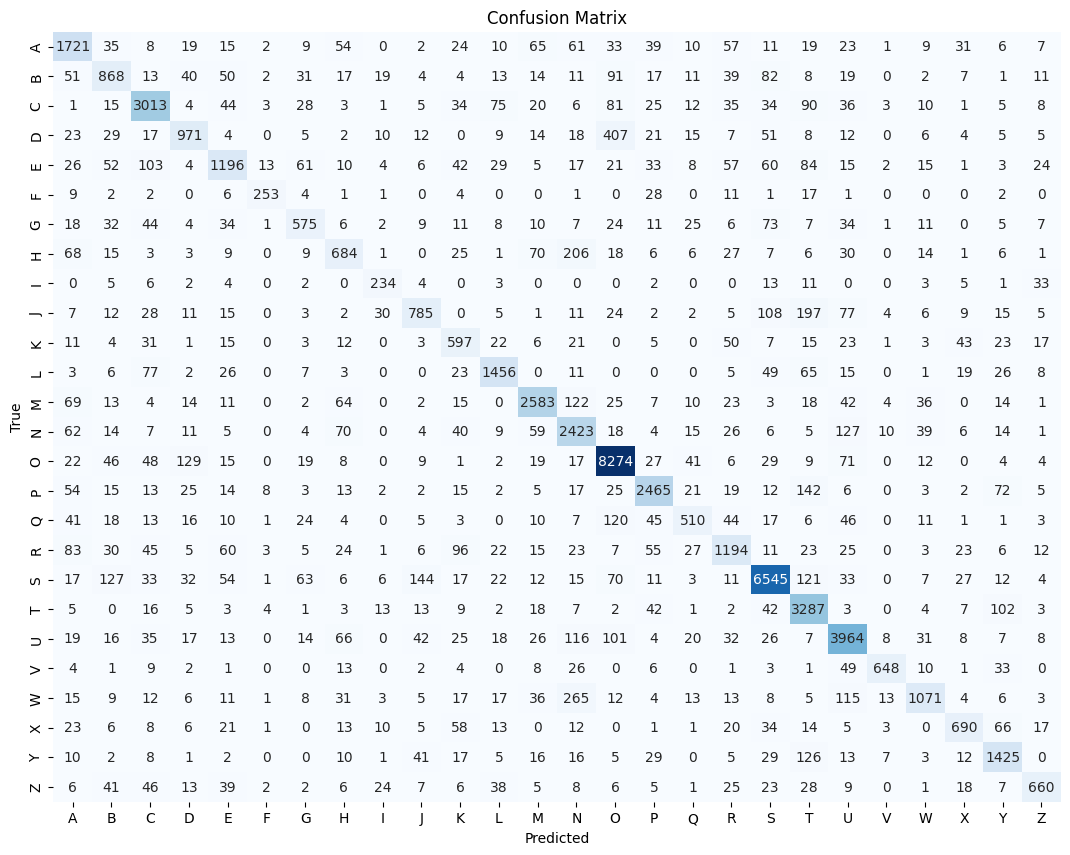

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import string

# Tạo một mảng chứa các chữ cái từ 'A' đến 'Z'
alphabet = list(string.ascii_uppercase)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(13, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[f'{alphabet[i]}' for i in range(26)], yticklabels=[f'{alphabet[i]}' for i in range(26)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **1.2 Tìm max depth tốt nhất**

In [ ]:
#Find the best max-depth for DT algorithm
max_depth_values = range(1, 40)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0
test_scores = []

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(X_test, y_test)
    test_scores.append(test_score)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth


In [ ]:
# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Best Max Depth = 18: Best Test Score = 0.8342422383928128


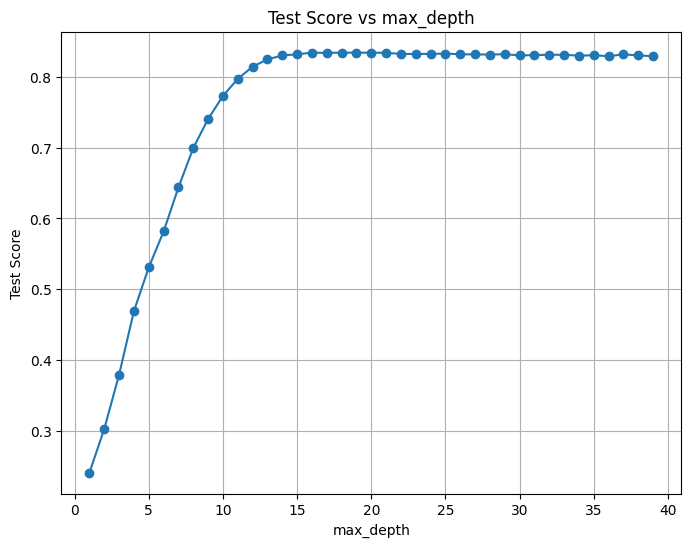

In [ ]:
plt.figure(figsize=(8, 6))
max_depth_values = range(1, 40)
plt.plot(max_depth_values, test_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Test Score')
plt.title('Test Score vs max_depth')
plt.grid(True)
plt.show()

In [ ]:
# Initialize the Decision Tree classifier
#dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier = DecisionTreeClassifier(max_depth =18,random_state=42)
# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.8342422383928128


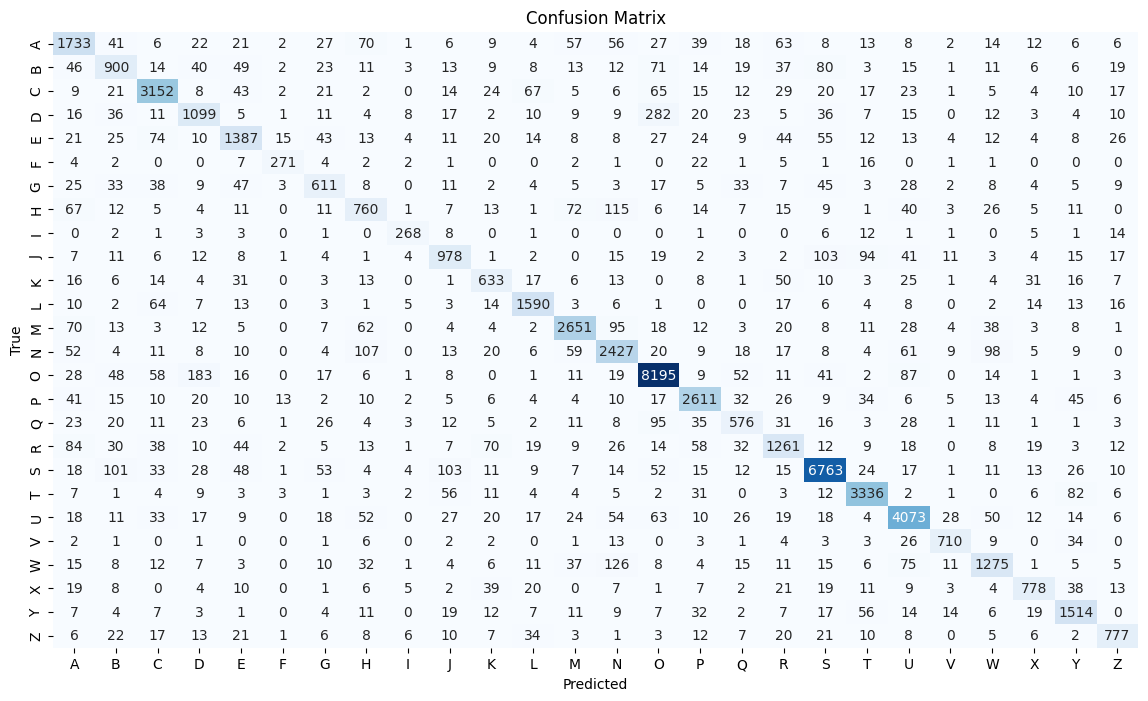

In [ ]:
# Tạo một mảng chứa các chữ cái từ 'A' đến 'Z'
alphabet = list(string.ascii_uppercase)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(14, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[f'{alphabet[i]}' for i in range(26)], yticklabels=[f'{alphabet[i]}' for i in range(26)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from joblib import dump, load
# Save model
dump(dt_classifier, '/content/drive/MyDrive/ML/A_Z/dt_classifier.joblib')

['/content/drive/MyDrive/ML/A_Z/dt_classifier.joblib']

# **2. Naive Bayes**

### **2.1 Xây dựng mô hình NB**

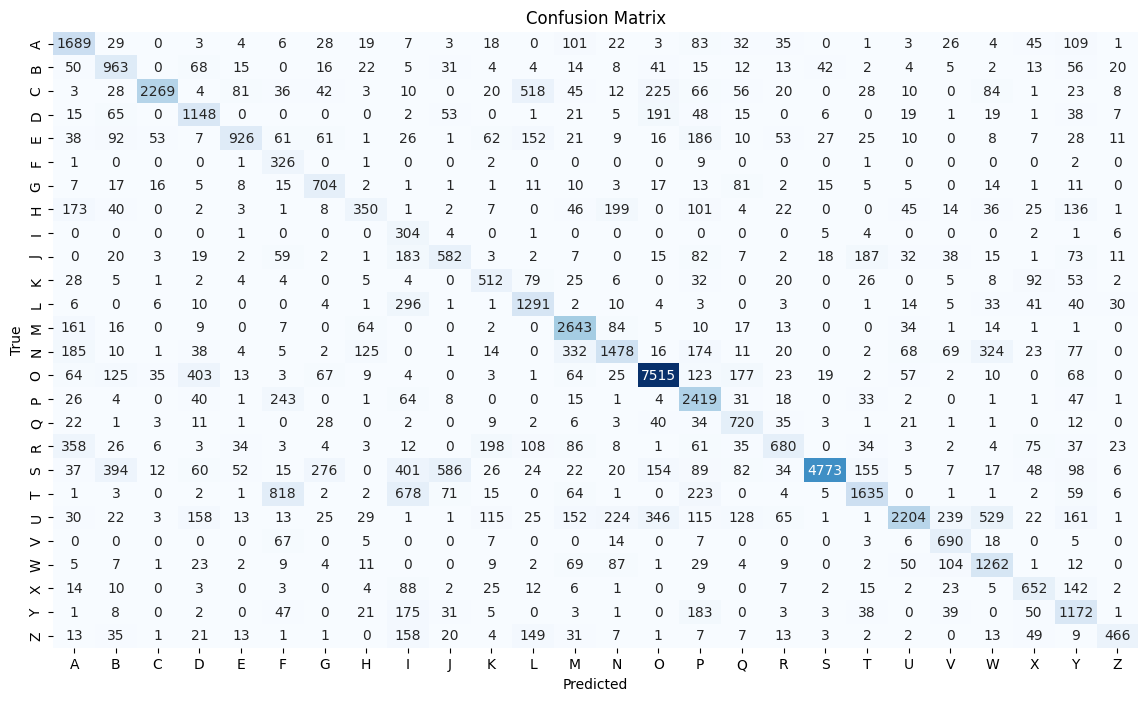

Accuracy on test set with best var_smoothing: 0.6526380347759784


In [ ]:
from sklearn.naive_bayes import GaussianNB
#Split your data
naive_bayes = GaussianNB()

# Train the model
naive_bayes .fit(X_train, y_train)

# Make predictions
y_pred_naive_bayes = naive_bayes.predict(X_test)


# Tạo một mảng chứa các chữ cái từ 'A' đến 'Z'
alphabet = list(string.ascii_uppercase)

cm = confusion_matrix(y_test, y_pred_naive_bayes)
plt.figure(figsize=(14, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[f'{alphabet[i]}' for i in range(26)], yticklabels=[f'{alphabet[i]}' for i in range(26)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

accuracy = naive_bayes.score(X_test, y_test)
print("Accuracy on test set with best var_smoothing:", accuracy)

### **2.2 Tìm var_smoothing tốt nhất**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Tạo một dict chứa các giá trị var_smoothing bạn muốn thử
param_grid = {'var_smoothing': np.logspace(0,-9, num=20)}

# Khởi tạo mô hình Gaussian Naive Bayes
naive_bayes = GaussianNB()

# Tạo GridSearchCV
grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit mô hình với dữ liệu huấn luyện
grid_search.fit(X_train, y_train)

# Xem giá trị var_smoothing tốt nhất
print("Best var_smoothing:", grid_search.best_params_['var_smoothing'])

# Xem hiệu suất của mô hình với var_smoothing tốt nhất trên tập kiểm tra
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy on test set with best var_smoothing:", accuracy)


Best var_smoothing: 0.11288378916846892
Accuracy on test set with best var_smoothing: 0.6972434484244725


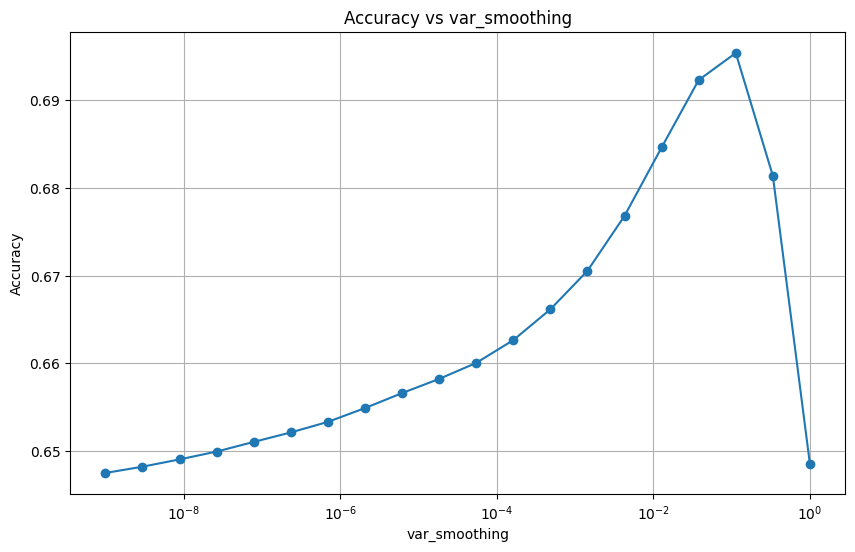

In [ ]:
import matplotlib.pyplot as plt

# Lấy các giá trị var_smoothing và độ chính xác tương ứng từ kết quả tìm kiếm grid_search
var_smoothing_values = grid_search.cv_results_['param_var_smoothing'].data
accuracies = grid_search.cv_results_['mean_test_score']

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(var_smoothing_values, accuracies, marker='o')
plt.xscale('log')  # Scale trục x theo logarithm
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.title('Accuracy vs var_smoothing')
plt.grid(True)
plt.show()


In [ ]:
# Tạo một dict chứa các giá trị var_smoothing bạn muốn thử
param_grid = {'var_smoothing': np.logspace(0,-2, num=10)}

# Khởi tạo mô hình Gaussian Naive Bayes
naive_bayes = GaussianNB()

# Tạo GridSearchCV
grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit mô hình với dữ liệu huấn luyện
grid_search.fit(X_train, y_train)

# Xem giá trị var_smoothing tốt nhất
print("Best var_smoothing:", grid_search.best_params_['var_smoothing'])

# Xem hiệu suất của mô hình với var_smoothing tốt nhất trên tập kiểm tra
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy on test set with best var_smoothing:", accuracy)

Best var_smoothing: 0.0774263682681127
Accuracy on test set with best var_smoothing: 0.6976744186046512


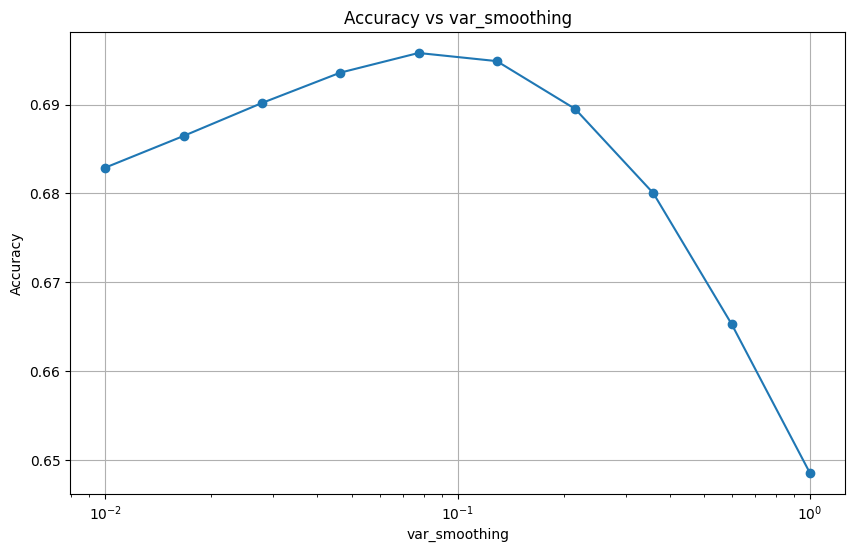

In [ ]:
# Lấy các giá trị var_smoothing và độ chính xác tương ứng từ kết quả tìm kiếm grid_search
var_smoothing_values = grid_search.cv_results_['param_var_smoothing'].data
accuracies = grid_search.cv_results_['mean_test_score']

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(var_smoothing_values, accuracies, marker='o')
plt.xscale('log')  # Scale trục x theo logarithm
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.title('Accuracy vs var_smoothing')
plt.grid(True)
plt.show()

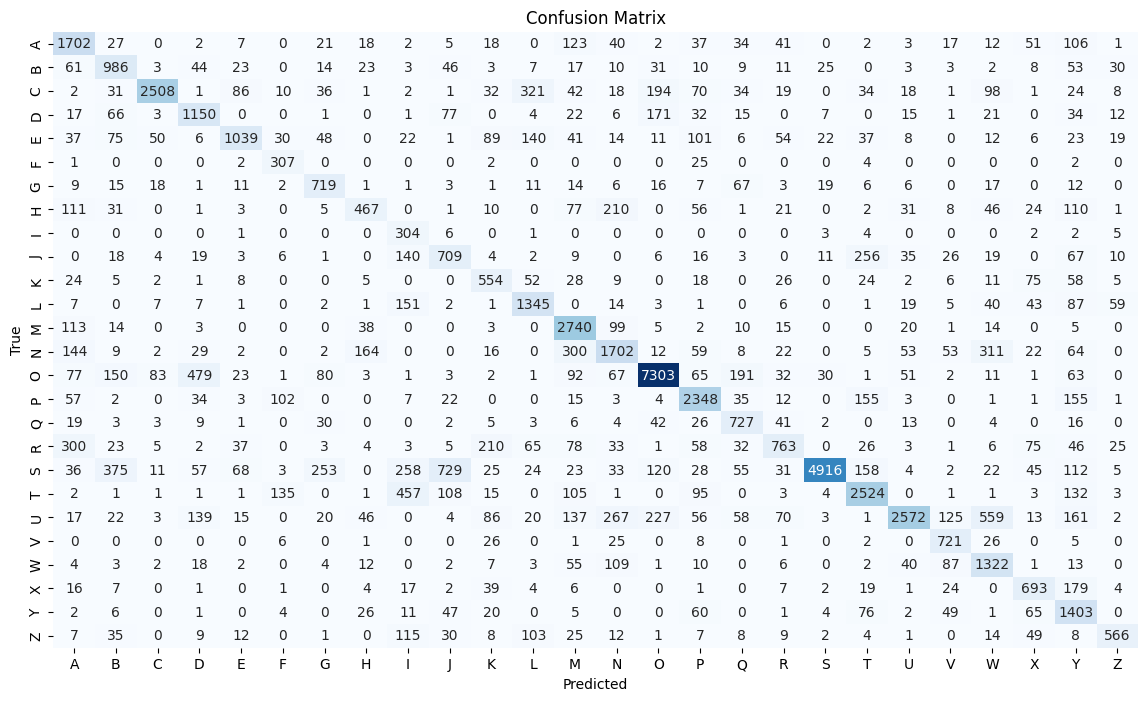

Accuracy on test set with best var_smoothing: 0.6976744186046512


In [ ]:
#Split your data
naive_bayes = GaussianNB(var_smoothing=0.0774263682681127)

# Train the model
naive_bayes .fit(X_train, y_train)

# Make predictions
y_pred_naive_bayes = naive_bayes.predict(X_test)

# Tạo một mảng chứa các chữ cái từ 'A' đến 'Z'
alphabet = list(string.ascii_uppercase)

cm = confusion_matrix(y_test, y_pred_naive_bayes)
plt.figure(figsize=(14, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[f'{alphabet[i]}' for i in range(26)], yticklabels=[f'{alphabet[i]}' for i in range(26)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

accuracy = naive_bayes.score(X_test, y_test)
print("Accuracy on test set with best var_smoothing:", accuracy)

In [ ]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_naive_bayes)
print(f"Naive Bayes Accuracy: {accuracy}")

Naive Bayes Accuracy: 0.6976744186046512


**Kết Luận:**

- Dựa trên việc tìm kiếm giá trị tối ưu cho var_smoothing thông qua GridSearchCV, mô hình Gaussian Naive Bayes đã được cải thiện từ mức độ chính xác ban đầu là khoảng 65.26% lên khoảng 69.77%. Việc tìm kiếm giá trị tốt nhất cho var_smoothing trong khoảng từ 1 đến 0.01 với 10 giá trị khác nhau đã giúp cải thiện hiệu suất của mô hình.

- Qua quá trình này, chúng ta đã xác định được rằng giá trị tối ưu của var_smoothing là một trong những yếu tố quan trọng ảnh hưởng đến hiệu suất của mô hình Naive Bayes trên tập dữ liệu kiểm tra. Điều này làm cho mô hình trở nên chính xác hơn và có khả năng tổng quát hóa tốt hơn trên dữ liệu mới.

In [ ]:
from joblib import dump, load
# Save model
dump(naive_bayes, '/content/drive/MyDrive/ML/A_Z/naive_bayes.joblib')

['/content/drive/MyDrive/ML/A_Z/naive_bayes.joblib']

# **3. Random Forest**

### **3.1 Tạo model Random forest**

In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [ ]:
# Tạo mô hình random forest
rf = RandomForestClassifier()
# fit mô hình với dư liệu train
rf.fit(X_train, y_train)

# Dự đoán mô hình với dữ liệu test
y_pred_rf = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.9515490062822192


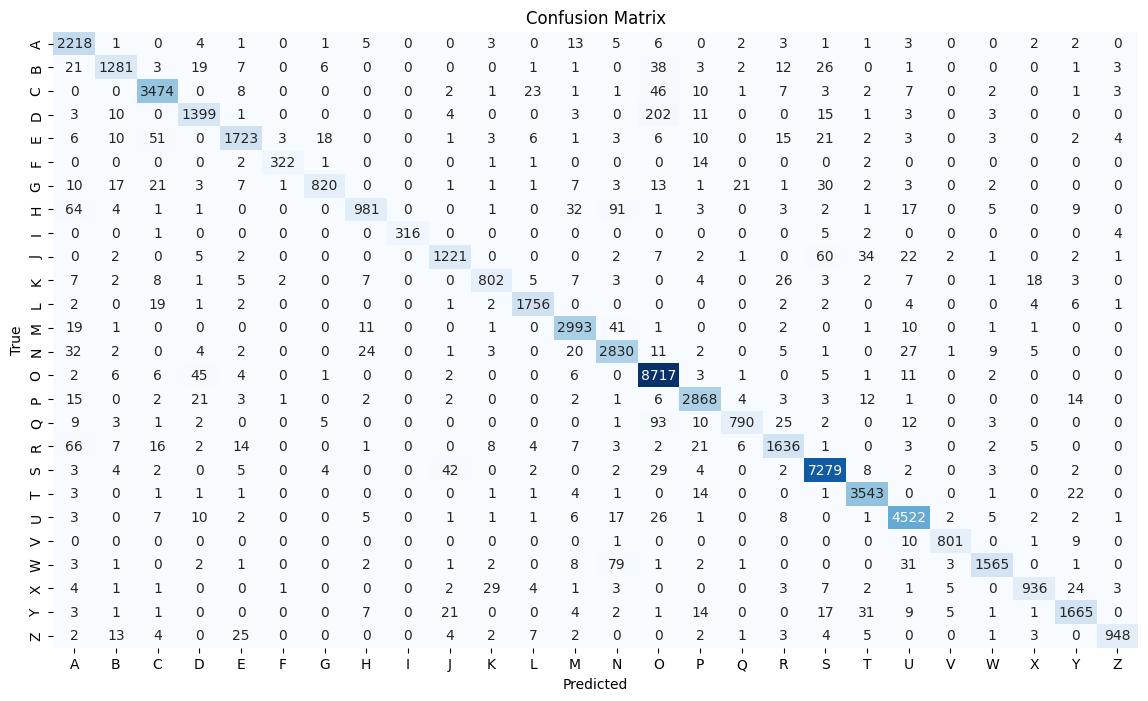

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import string

# Tạo một mảng chứa các chữ cái từ 'A' đến 'Z'
alphabet = list(string.ascii_uppercase)

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(14, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[f'{alphabet[i]}' for i in range(26)], yticklabels=[f'{alphabet[i]}' for i in range(26)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **3.2 Hyperparameter tuning RF**

**3.2.1 Thay đổi Criterion**

In [ ]:
# Tạo mô hình Random Forest với criterion là entropy
rf_entropy = RandomForestClassifier(criterion='entropy')

# Fit mô hình với dữ liệu train
rf_entropy.fit(X_train, y_train)

# Dự đoán với dữ liệu test
y_pred_rf_entropy = rf_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_rf_entropy)
print("Accuracy with Entropy:", accuracy_entropy)


Accuracy with Entropy: 0.9512837938636477



*** Kết quả:**
- **Giảm Accuracy:** Thay đổi từ Gini sang Entropy dẫn đến giảm Accuracy. Cách tính Entropy không phù hợp hoặc không tối ưu trên dữ liệu này.


- **So sánh Phương pháp:** Việc thử nghiệm và so sánh giữa Gini và Entropy giúp xác định phương pháp nào hoạt động tốt hơn trên dữ liệu. Trong trường hợp này, dù giảm từ Gini sang Entropy, Accuracy giảm nhẹ và không có sự cải thiện đáng kể trong hiệu suất của mô hình.


**3.2.2 Tuning n_estimators**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# List để lưu trữ giá trị n_estimators và accuracy tương ứng
estimators_range = range(100, 501, 50)
accuracies = []

for n in estimators_range:
    # Tạo mô hình Random Forest với số cây là n_estimators
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    # Đánh giá độ chính xác và lưu vào list accuracies
    accuracy = accuracy_score(y_test, y_pred_rf)
    accuracies.append(accuracy)



In [ ]:
print(accuracies)
print(f"- Độ lệch: {max(accuracies) - min(accuracies)}")

[0.9510683087735583, 0.9525435528518623, 0.9534717963168625, 0.952858492598916, 0.9535215236453447, 0.9540519484824876, 0.9536872814069519, 0.954035372706327, 0.954151403139452]
- Độ lệch: 0.0030830943658937127


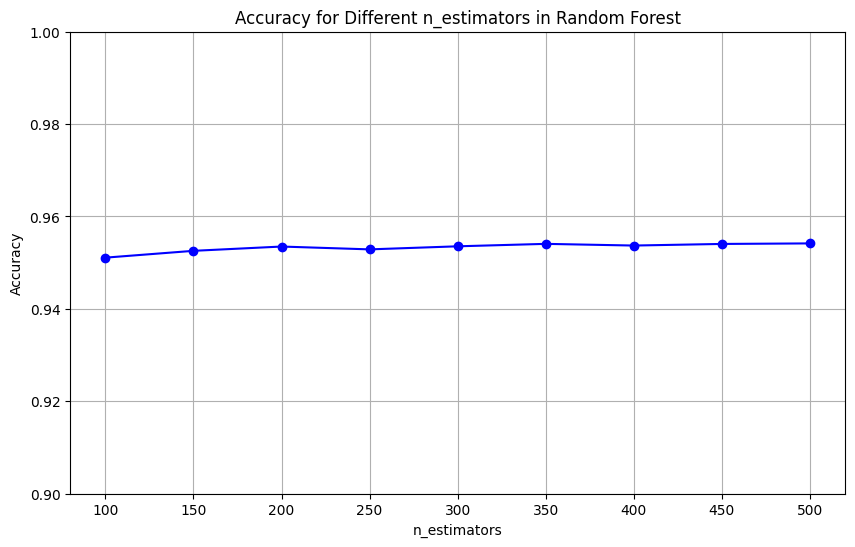

In [ ]:

# Vẽ biểu đồ đường accuracy theo số cây (n_estimators)
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy for Different n_estimators in Random Forest')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.ylim(0.9,1)
plt.grid(True)
plt.show()

**Kết luận**

- Với danh sách các giá trị accuracy như vậy và độ lệch nhỏ (0.0030830943658937127), ta có thể kết luận rằng số lượng cây (n_estimators) không có ảnh hưởng đáng kể đến hiệu suất của model trong phạm vi các giá trị đã thử. Điều này có thể ám chỉ rằng mô hình đã đạt tới mức độ tối ưu về số lượng cây cần sử dụng cho bài toán này.

In [ ]:
from joblib import dump, load
# Save model
dump(rf, '/content/drive/MyDrive/ML/A_Z/rf.joblib')

['/content/drive/MyDrive/ML/A_Z/rf.joblib']

## **4. Convolutional Neural Network (CNN)**

### **4.1 Chuẩn bị dữ liệu cho mô hình CNN**

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

df = pd.read_csv("/content/drive/MyDrive/A_Z.csv")

# Tạo danh sách tên cột
column_names = ["label"] + [f"{i}x{j}" for i in range(1, 29) for j in range(1, 29)]

# Đặt tên cột cho DataFrame
df.columns = column_names
df = df.drop_duplicates()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201095 entries, 0 to 372448
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 1.2 GB


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Đảm bảo cột "label" chứa nhãn và các cột từ "1x1" đến "28x28" chứa giá trị pixel

# Xác định các features (X) và nhãn (y)
X_cnn = df.iloc[:, 1:].values.reshape(-1, 28, 28, 1)  # Reshape thành ảnh kích thước 28x28x1
y_cnn = df['label'].values

# Tiêu chuẩn hóa giá trị pixel về khoảng [0, 1]
X_cnn = X_cnn / 255.0

# One-hot encode nhãn
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_cnn)

# Chia dữ liệu thành tập train và test
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_one_hot, test_size=0.3, random_state=42)

In [4]:
# Lưu X_test và y_test xuống file
np.save('/content/drive/MyDrive/ML/A_Z/X_test_cnn.npy', X_test_cnn)
np.save('/content/drive/MyDrive/ML/A_Z/y_test_cnn.npy', y_test_cnn)

### **4.2 Xây dựng và huấn luyện mô hình CNN**

In [5]:
# Xây dựng cấu trúc mô hình CNN
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #28*28*32
model.add(MaxPooling2D((2, 2))) #14*14*32

model.add(Conv2D(64, (3, 3), activation='relu')) #14*14*32*32
model.add(MaxPooling2D((2, 2))) #7*7*32*32

model.add(Flatten()) #50176
model.add(Dense(128, activation='relu'))  #128
model.add(Dense(26, activation='softmax'))  # ở đây là 26 vì có 26 chữ cái

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Chạy model và lưu lại history
history = model.fit(X_train_cnn, y_train_cnn, epochs=20, validation_data=(X_test_cnn, y_test_cnn))

# Đánh giá mô hình trên tập test
accuracy = model.evaluate(X_test_cnn, y_test_cnn)[1]
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

Epoch 1/20
4399/4399 [==============================] - 160s 36ms/step - loss: 0.1920 - accuracy: 0.9457 - val_loss: 0.0917 - val_accuracy: 0.9736
Epoch 2/20
4399/4399 [==============================] - 148s 34ms/step - loss: 0.0757 - accuracy: 0.9790 - val_loss: 0.0706 - val_accuracy: 0.9807
Epoch 3/20
4399/4399 [==============================] - 158s 36ms/step - loss: 0.0548 - accuracy: 0.9838 - val_loss: 0.0746 - val_accuracy: 0.9797
Epoch 4/20
4399/4399 [==============================] - 147s 33ms/step - loss: 0.0420 - accuracy: 0.9878 - val_loss: 0.0742 - val_accuracy: 0.9801
Epoch 5/20
4399/4399 [==============================] - 143s 33ms/step - loss: 0.0332 - accuracy: 0.9902 - val_loss: 0.0632 - val_accuracy: 0.9843
Epoch 6/20
4399/4399 [==============================] - 151s 34ms/step - loss: 0.0260 - accuracy: 0.9919 - val_loss: 0.0730 - val_accuracy: 0.9825
Epoch 7/20
4399/4399 [==============================] - 143s 32ms/step - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0

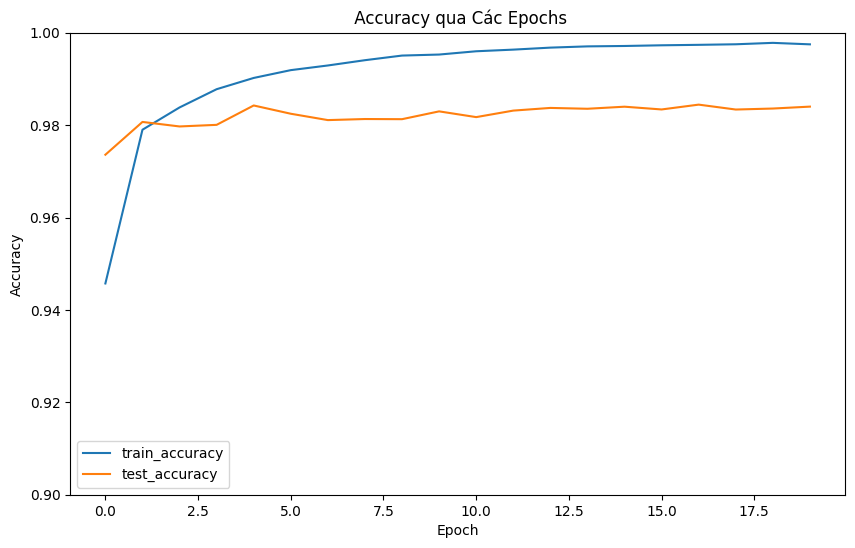

In [15]:
import matplotlib.pyplot as plt

Epoch = range(1, 21,1)
# Vẽ biểu đồ accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title(' Accuracy qua Các Epochs')
plt.ylim(0.9, 1)  # Đặt giới hạn trục y từ 0.9 đến 1
plt.legend()
plt.show()

1886/1886 [==============================] - 3s 2ms/step


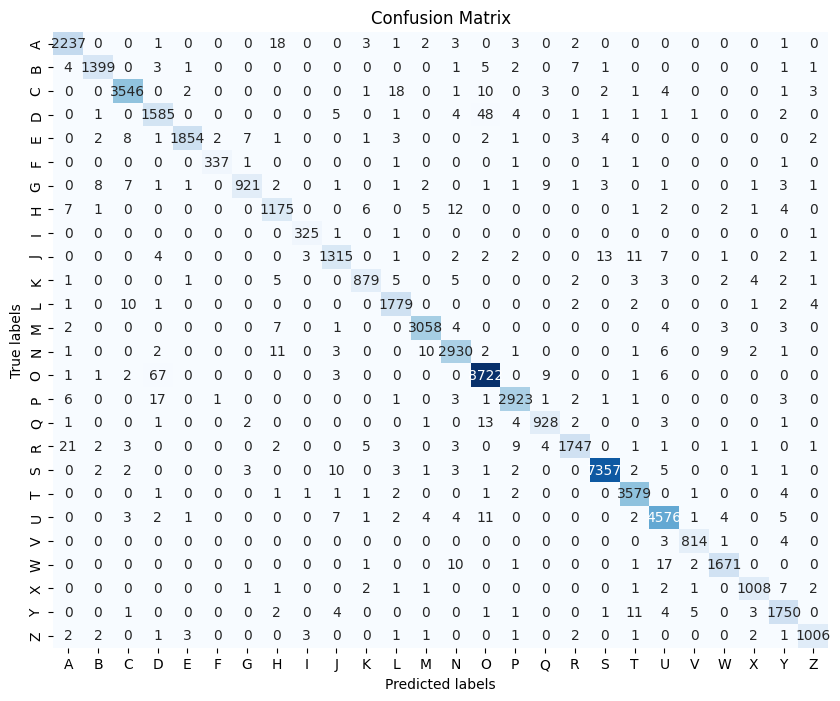

In [ ]:
import string

# Dự đoán nhãn trên tập test
y_pred_cnn = model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred_cnn, axis=1)
y_true = np.argmax(y_test_cnn, axis=1)

# Tính toán ma trận nhầm lẫn
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Danh sách chữ cái từ A đến Z
labels = list(string.ascii_uppercase)

# Vẽ ma trận nhầm lẫn dưới dạng heatmap với nhãn là chữ cái
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from joblib import dump, load
# Save model
dump(model, '/content/drive/MyDrive/ML/A_Z/model_cnn.joblib')

['/content/drive/MyDrive/ML/A_Z/model_cnn.joblib']

### **4.3 Đánh giá hiệu suất của mô hình**

# **IV. So sánh và đánh giá các mô hình**

In [ ]:
from joblib import dump, load
dt_classifier = load('/content/drive/MyDrive/ML/A_Z/dt_classifier.joblib')
naive_bayes = load('/content/drive/MyDrive/ML/A_Z/naive_bayes.joblib')
rf = load('/content/drive/MyDrive/ML/A_Z/rf.joblib')
model = load('/content/drive/MyDrive/ML/A_Z/model_cnn.joblib')

# Đọc lại dữ liệu từ file
X_test = np.load('/content/drive/MyDrive/ML/A_Z/X_test3.npy')
y_test = np.load('/content/drive/MyDrive/ML/A_Z/y_test3.npy')
# Đọc lại dữ liệu từ file
X_test_cnn = np.load('/content/drive/MyDrive/ML/A_Z/X_test_cnn.npy')
y_test_cnn = np.load('/content/drive/MyDrive/ML/A_Z/y_test_cnn.npy')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Định nghĩa dữ liệu test
# X_test, y_test

# Đánh giá Decision Tree
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

# Đánh giá Naive Bayes
nb_predictions = naive_bayes.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')

# Đánh giá Random Forest
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

# Dự đoán nhãn trên tập test với model CNN
y_pred_cnn = model.predict(X_test_cnn)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)
y_true_cnn = np.argmax(y_test_cnn, axis=1)

# Đánh giá model CNN
cnn_accuracy = accuracy_score(y_true_cnn, y_pred_classes_cnn)
cnn_precision = precision_score(y_true_cnn, y_pred_classes_cnn, average='weighted')
cnn_recall = recall_score(y_true_cnn, y_pred_classes_cnn, average='weighted')
cnn_f1 = f1_score(y_true_cnn, y_pred_classes_cnn, average='weighted')

# In kết quả đánh giá cho model CNN
print("CNN Model:")
print(f"Accuracy: {cnn_accuracy:.4f}, Precision: {cnn_precision:.4f}, Recall: {cnn_recall:.4f}, F1-score: {cnn_f1:.4f}")
# In kết quả
print("\nDecision Tree:")
print(f"Accuracy: {dt_accuracy:.4f}, Precision: {dt_precision:.4f}, Recall: {dt_recall:.4f}, F1-score: {dt_f1:.4f}")

print("\nNaive Bayes:")
print(f"Accuracy: {nb_accuracy:.4f}, Precision: {nb_precision:.4f}, Recall: {nb_recall:.4f}, F1-score: {nb_f1:.4f}")

print("\nRandom Forest:")
print(f"Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-score: {rf_f1:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1886/1886 [==============================] - 5s 2ms/step
CNN Model:
Accuracy: 0.9849, Precision: 0.9850, Recall: 0.9849, F1-score: 0.9850

Decision Tree:
Accuracy: 0.8342, Precision: 0.8332, Recall: 0.8342, F1-score: 0.8335

Naive Bayes:
Accuracy: 0.6977, Precision: 0.7442, Recall: 0.6977, F1-score: 0.7053

Random Forest:
Accuracy: 0.9523, Precision: 0.9524, Recall: 0.9523, F1-score: 0.9518


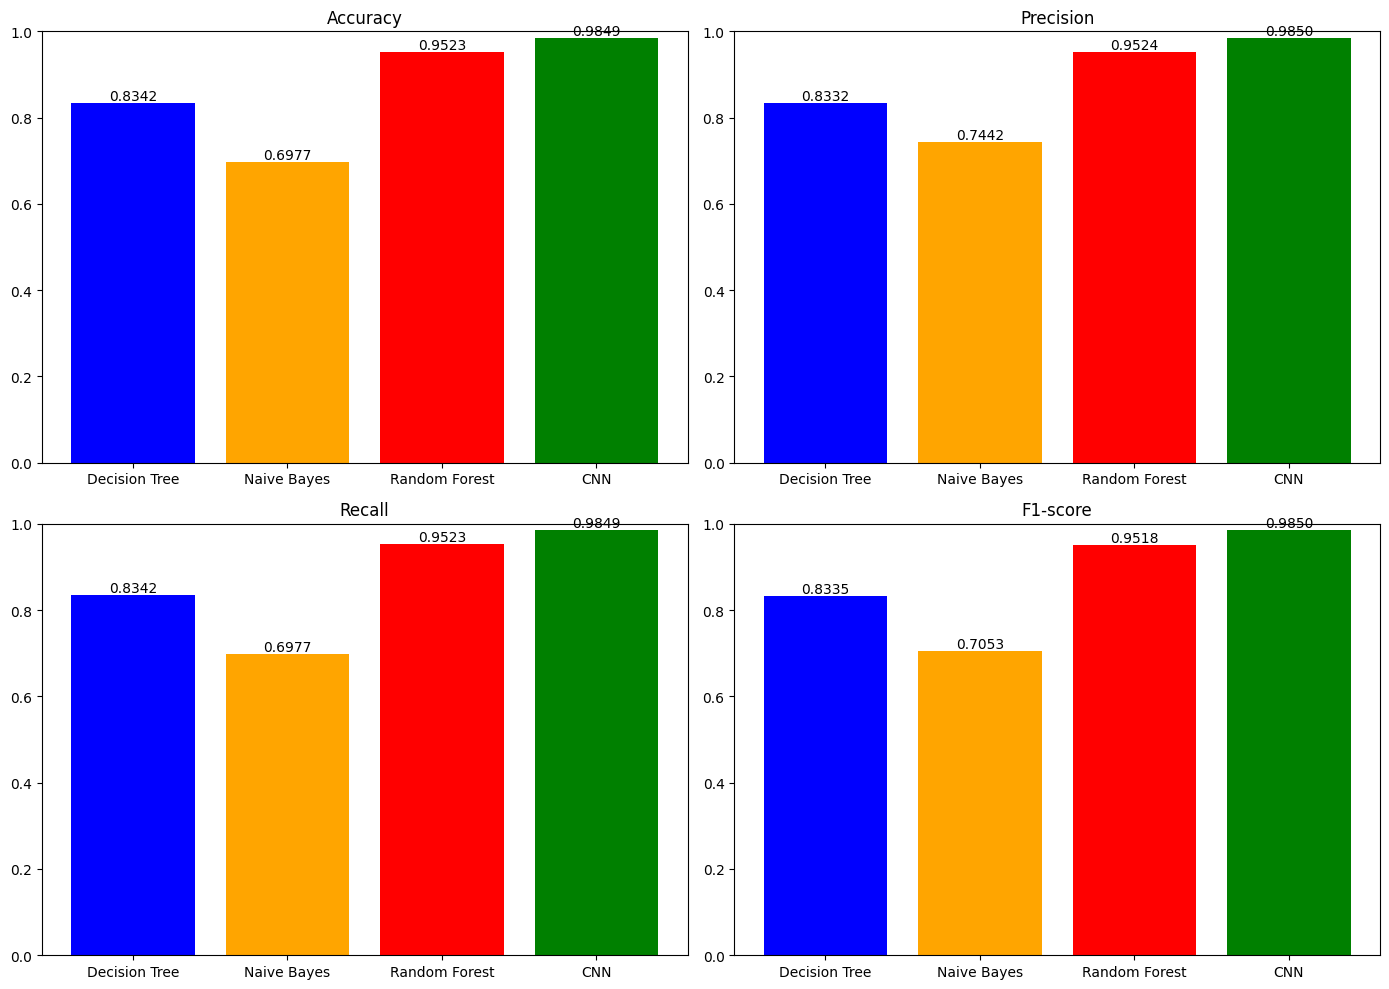

In [ ]:
import matplotlib.pyplot as plt


# Thêm giá trị của model CNN vào các list
accuracies = [dt_accuracy, nb_accuracy, rf_accuracy, cnn_accuracy]
precisions = [dt_precision, nb_precision, rf_precision, cnn_precision]
recalls = [dt_recall, nb_recall, rf_recall, cnn_recall]
f1_scores = [dt_f1, nb_f1, rf_f1, cnn_f1]

# Tên của các mô hình
models = ['Decision Tree', 'Naive Bayes', 'Random Forest', 'CNN']

# Vẽ 4 biểu đồ
plt.figure(figsize=(14, 10))

plt.subplot(221)
bars = plt.bar(models, accuracies,  color=['blue', 'orange', 'red','green'])
plt.title('Accuracy')
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1 (độ chính xác không vượt quá 1)

# Hiển thị số điểm trên từng cột
plt.bar_label(bars, fmt='%.4f', label_type='edge')

plt.subplot(222)
bars = plt.bar(models, precisions,  color=['blue', 'orange', 'red','green'])
plt.title('Precision')
plt.ylim(0, 1)

plt.bar_label(bars, fmt='%.4f', label_type='edge')

plt.subplot(223)
bars = plt.bar(models, recalls,  color=['blue', 'orange', 'red','green'])
plt.title('Recall')
plt.ylim(0, 1)

plt.bar_label(bars, fmt='%.4f', label_type='edge')

plt.subplot(224)
bars = plt.bar(models, f1_scores,  color=['blue', 'orange', 'red','green'])
plt.title('F1-score')
plt.ylim(0, 1)

plt.bar_label(bars, fmt='%.4f', label_type='edge')

plt.tight_layout()
plt.show()

## 1. CNN Model (Convolutional Neural Network)
**Điểm mạnh:**
- Đạt độ chính xác (accuracy) cao nhất so với các thuật toán khác.
- Hiệu suất tốt trong việc nhận diện và phân loại hình ảnh.
- Có khả năng học và nhận diện các đặc trưng phức tạp trong hình ảnh.

**Điểm yếu:**
- Yêu cầu nhiều dữ liệu huấn luyện và thời gian huấn luyện lâu hơn so với các thuật toán cổ điển.


---


## 2. Decision Tree
**Điểm mạnh:**
- Có độ chính xác ổn định (khoảng 83.42%) nhưng thấp hơn rõ rệt so với CNN.
- Dễ hiểu và dễ diễn giải cho người mới.
- Không yêu cầu nhiều tiền xử lý dữ liệu.

**Điểm yếu:**
- Hiệu suất tổng thể không cao như CNN, đặc biệt trên dữ liệu hình ảnh phức tạp.
- Có thể bị overfitting trên dữ liệu phức tạp.

---


## 3. Naive Bayes
**Điểm mạnh:**
- Đơn giản và dễ triển khai.

**Điểm yếu:**
- Quá đơn giản không thích hợp với các dữ liệu lớn có nhiều chiều như hình ảnh.
- Độ chính xác và hiệu suất tổng thể thấp hơn so với CNN và các thuật toán khác trên dữ liệu hình ảnh.
- Hiệu suất tổng thể không cao như CNN, đặc biệt trên dữ liệu hình ảnh.
---
## 4. Random Forest
**Điểm mạnh:**
- Có độ chính xác cao (khoảng 95.23%), tuy nhiên không bằng với CNN.
- Độ chính xác cao hơn so với Decision Tree.
- Hiệu suất tốt trên dữ liệu có số lượng chiều lớn

**Điểm yếu:**
- Yêu cầu độ phức tạp và thời gian huấn luyện cao hơn so với Naive Bayes và Decision Tree.
- Có thể không hiệu quả trên dữ liệu có nhiễu hoặc không đồng nhất.
---
==> CNN thường được ưu tiên trong việc xử lý dữ liệu hình ảnh vì khả năng học tập và nhận diện đặc trưng tốt. Tuy nhiên, điều này đôi khi đi kèm với yêu cầu về tài nguyên tính toán và dữ liệu lớn hơn để huấn luyện. Các thuật toán cổ điển thì đơn giản và dễ triển khai, nhưng hiệu suất của chúng có thể bị hạn chế trên dữ liệu hình ảnh phức tạp.

# **5. Kiểm tra với dữ liệu thật**

In [ ]:
from joblib import dump, load
dt_classifier = load('/content/drive/MyDrive/ML/A_Z/dt_classifier.joblib')
naive_bayes = load('/content/drive/MyDrive/ML/A_Z/naive_bayes.joblib')
rf = load('/content/drive/MyDrive/ML/A_Z/rf.joblib')
model = load('/content/drive/MyDrive/ML/A_Z/model_cnn.joblib')

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Hàm test
def test_models(path_to_image):
  # Load ảnh sử dụng Pillow
  img = Image.open(path_to_image)
  # Chuyển ảnh sang ảnh xám (đen trắng)
  img = img.convert('L')
  # Đảo màu của ảnh đen trắng
  img = Image.eval(img, lambda x: 255 - x)

  # Resize ảnh về kích thước 28x28 pixel
  img_resized = img.resize((20, 20))

  # Tạo ảnh mới 28x28
  img_resized_28x28 = Image.new('L', (28, 28), color=0)  # Tạo ảnh mới với màu đen (giá trị pixel 0)

  # Chèn ảnh img_resized vào vị trí trung tâm của ảnh mới 28x28
  width, height = img_resized.size
  x_pos = (28 - width) // 2
  y_pos = (28 - height) // 2
  img_resized_28x28.paste(img_resized, (x_pos, y_pos))

  # Hiển thị ảnh gốc
  plt.subplot(1, 3, 1)
  plt.title('Original Image')
  plt.imshow(img,cmap='binary')

  # Hiển thị ảnh đã resize
  plt.subplot(1, 3, 2)
  plt.title('Resized Image (20x20)')
  plt.imshow(img_resized,cmap='binary')

  # Hiển thị ảnh đã resize
  plt.subplot(1, 3, 3)
  plt.title('Resized Image (28x28)')
  plt.imshow(img_resized_28x28,cmap='binary')

  plt.tight_layout()
  plt.show()

  a = np.array(img_resized)
  a = a.reshape(20,20)

  a2 = np.array(img_resized_28x28)
  a2= a2.reshape(28,28)

  df_test = pd.DataFrame(a.reshape(1,-1))
  df_test_cnn = pd.DataFrame(a2.reshape(1,-1))
  df_test_cnn =df_test_cnn.values.reshape(-1, 28, 28, 1)

  # kiểm tra với cây quyết định
  y_pred_2 = dt_classifier.predict(df_test)
  print(y_pred_2)

  # kiểm tra với naive bayes
  y_pred3 = naive_bayes.predict(df_test)
  print(y_pred3)

  # kiểm tra với naive bayes
  y_pred4 = rf.predict(df_test)
  print(y_pred4)

  # kiểm tra với cnn
  y_pred_cnn = model.predict(df_test_cnn)
  print(np.argmax(y_pred_cnn))

  # Hàm chuyển đổi class thành Kí tự chữ cái
  def map_to_alphabet(y_pred):
      return chr(y_pred + 65) if y_pred >= 0 and y_pred <= 25 else None

  # Sử dụng hàm để ánh xạ giá trị dự đoán thành các ký tự
  print("Kết quả của Decision Tree là :  " + map_to_alphabet(y_pred_2[0]))
  print("Kết quả của Naive Bayes là :  " + map_to_alphabet(y_pred3[0]))
  print("Kết quả của Random Forest là :  " + map_to_alphabet(y_pred4[0]))
  print("Kết quả của CNN là :  " + map_to_alphabet(np.argmax(y_pred_cnn)))

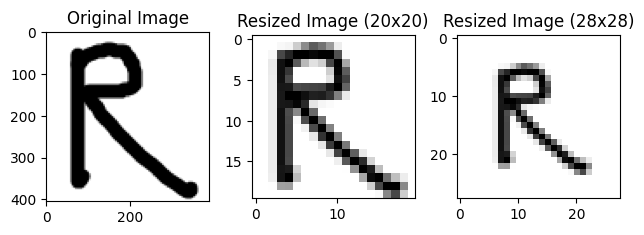

[17]
[10]
[17]
1/1 [==============================] - 0s 17ms/step
17
Kết quả của Decision Tree là :  R
Kết quả của Naive Bayes là :  K
Kết quả của Random Forest là :  R
Kết quả của CNN là :  R


In [ ]:
import warnings

# Tắt các cảnh báo
warnings.filterwarnings('ignore')

test_models("/content/Ảnh chụp màn hình 2023-12-24 041650.png")

# **VI. Kết luận và Hướng phát triển**


- **Kết luận**:
  - CNN đạt hiệu suất cao nhất, nhưng yêu cầu tài nguyên lớn.
  - Các thuật toán cổ điển có hiệu suất thấp hơn trên dữ liệu hình ảnh.

- **Hướng phát triển**:
  - Tối ưu hóa CNN, kết hợp mô hình để cải thiện hiệu suất.
  - Tối ưu hóa dữ liệu và thử nghiệm kết hợp thuật toán.